In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection as ms

In [4]:
cancer_data = datasets.load_breast_cancer()
y = cancer_data.target
X = cancer_data.data # 30 attributes
X = preprocessing.scale(X) #scale each atribute to zero-mean adn unit variance

/Users/taniaincio/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


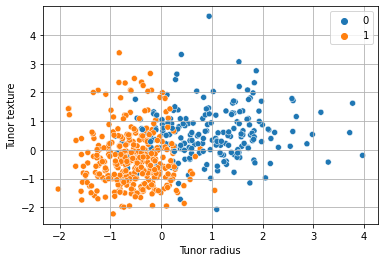

In [12]:
sns.scatterplot(X[:,0], X[:,1], hue=y);
plt.xlabel('Tumor radius')
plt.ylabel('Tumor texture')
plt.grid(True)
plt.show()

In [15]:
alpha = np.arange(1e-15, 1, 0.005)
val_scores = np.zeros((len(alpha), 1))

for i in range(len(alpha)):
    # set SVM with hinge loss and 12 norm regularization
    model = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha[i])
    #calculaet cross validation
    score = ms.cross_val_score(model, X, y, cv=5)
    val_scores[i] = score.mean()


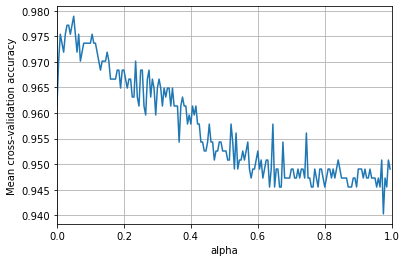

In [16]:
# plot how cross-validation score changes with alpha
plt.plot(alpha, val_scores)
plt.xlim(0,1)
plt.xlabel('alpha')
plt.ylabel('Mean cross-validation accuracy')
plt.grid(True)
plt.show()

In [18]:
np.argmax(val_scores)

10

In [19]:
# determine the alpha that maximize cross-validation score
ind = np.argmax(val_scores)
alpha_star = alpha[ind]
print('alpha_star = ', alpha_star)

alpha_star =  0.050000000000001


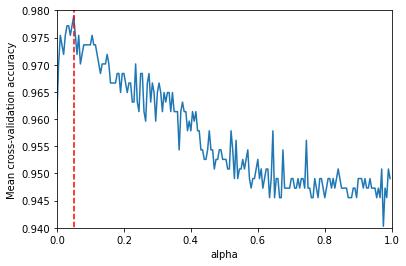

In [24]:
plt.plot(alpha, val_scores)
plt.plot(np.ones(11)*alpha_star, np.arange(0,1.1,0.1), '--r')
plt.xlim(0,1)
plt.ylim(0.94, 0.98)
plt.xlabel('alpha')
plt.ylabel('Mean cross-validation accuracy')
plt.show()

In [26]:
# Train model with alpha star
model_star = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha_star)
model_trained = model_star.fit(X,y)
print('Training accurcy = ', model_trained.score(X,y))

Training accurcy =  0.9806678383128296


In [29]:
#Plot decision boundary of trained model

slope = model_trained.coef_[0,1]/-model_trained.coef_[0,0]
slope

-1.2488597580903207

/Users/taniaincio/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


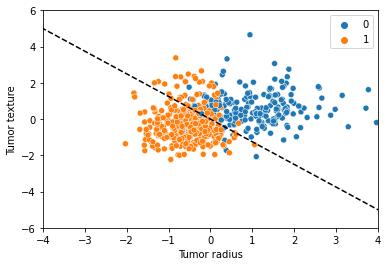

In [33]:
x1 = np.arange(-10, 10, 0.5)
y1 = slope*x1
sns.scatterplot(X[:,0], X[:,1], hue=y)
plt.plot(x1,y1,'--k')
plt.ylim(-6,6)
plt.xlim(-4,4)
plt.xlabel('Tumor radius')
plt.ylabel('Tumor texture')
plt.show()